In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [2]:
def load_lennard_jones_forces(r_ij):
    # forces - это величины -dU/rdr. Сила получается домножением на r_ij
    sigma_pow6, epsilon_x4, r_cut = 1.0, 4.0, 1.0  
    energy_r_cut = epsilon_x4 * (sigma_pow6 * sigma_pow6 / (r_cut ** 12) - sigma_pow6 / (r_cut ** 6))
    energies = epsilon_x4 * (sigma_pow6 * sigma_pow6 / (r_ij ** 12) - sigma_pow6 / (r_ij ** 6)) - energy_r_cut
    forces = 6.0 * epsilon_x4 * (2.0 * sigma_pow6 * sigma_pow6 / (r_ij ** 13) - sigma_pow6 / (r_ij ** 7))
    forces = forces / r_ij
    potential_table = np.array([energies, forces], dtype=np.float).transpose()
    return potential_table

In [8]:
r_ij = 0.5 + 0.0001 * np.arange(1, 25000 + 1)
potential_table = load_lennard_jones_forces(r_ij)
potential_ij = np.array([item[0] for item in potential_table])
force_ij  = np.array([item[1] for item in potential_table])

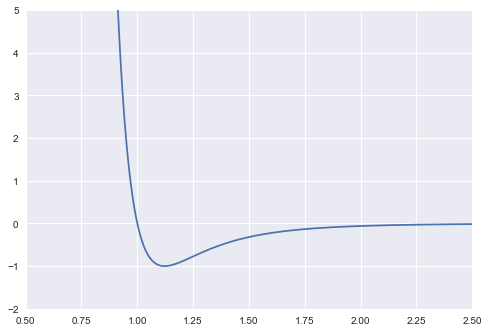

In [13]:
plt.plot(r_ij, potential_ij);
plt.xlim(left=0.5, right=2.5);
plt.ylim(bottom=-2, top=5);

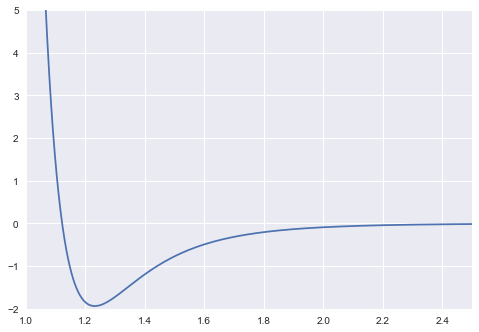

In [14]:
plt.plot(r_ij, force_ij);
plt.xlim(left=1, right=2.5);
plt.ylim(bottom=-2, top=5);